In [128]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import regex as re


# Load Datasets

In [129]:
#loading Primary 
primary_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Merged files/merged-csv-files.csv")
primary_data.head(5)

,text,max_freq_val
0,\n\n\n\n\n\n\n#CovidVaccine\n#WaitForVaccine… ...,[True]
1,CDC Updates School Guidelines For Students Ret...,[False]
2,Who will get the first doses of a coronavirus ...,[True]
3,CDC puts in place new guidelines on masks in s...,[False]
4,People who are fully vaccinated can travel wit...,[True]


In [130]:
#Loading Secondary Dataset
secondary_data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Merged files/Secondary_new.csv', encoding='cp1252')
secondary_data.head(5)

,text,max_freq_val
0,What do you mean that the pandemic has stretch...,[False]
1,I’m not sure if it qualifies as Big Brother wh...,[False]
2,What if smallpox and polio came roaring back o...,[True]
3,"I'm continuing to wear a mask. Even in bed, s...",[True]
4,"Although my husband and I really, really miss ...",[False]


In [131]:
primary_data.columns

Index(['text', 'max_freq_val'], dtype='object')

In [132]:
primary_data.size

3000

In [133]:
primary_data['text'].apply(lambda X: len(X.split(' '))).sum()

36270

[True]     910
[False]    590
Name: max_freq_val, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


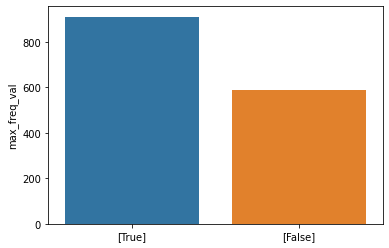

In [134]:
x=primary_data['max_freq_val'].value_counts()
print(x)
sns.barplot(x.index,x)


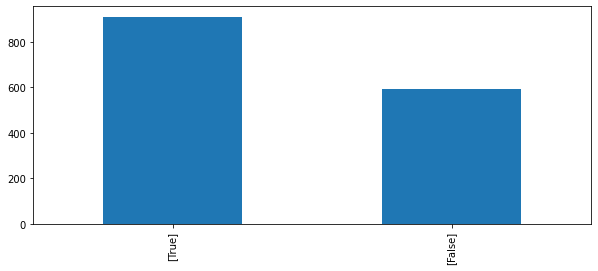

In [135]:
df_freq_val = ['[True]', '[False]']
plt.figure(figsize=(10,4))
primary_data.max_freq_val.value_counts().plot(kind='bar');


[True]     495
[False]    405
Name: max_freq_val, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


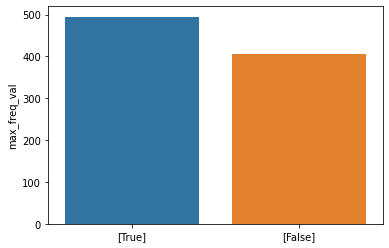

In [136]:
x=secondary_data['max_freq_val'].value_counts()
print(x)
sns.barplot(x.index,x)

# Cleaning Data (Removing URls from text),Punctuations , Stopwords etc

In [137]:
primary_data['text'] = primary_data['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True)


Creating a new csv file for cleaned primary data set

In [138]:
primary_data.to_csv("df_primary.csv")

# Split Primary dataset into Train (70%) and Test(30%) and use the secondary dataset as a test set

In [139]:
df1 = pd.read_csv('/content/df_primary.csv')

In [173]:
# Split Primary dataset into Train (70%) and Test(30%)

X1_train, X1_test, y1_train, y1_test = train_test_split(primary_data.text, primary_data.max_freq_val, test_size=0.3)




In [174]:
print(y1_train.shape)
print(y1_test.shape)
print(X1_train.shape)
print(X1_test.shape)


(1050,)
(450,)
(1050,)
(450,)


In [175]:
y1_test.value_counts()

[True]     274
[False]    176
Name: max_freq_val, dtype: int64

#Cleaning secondary Dataset

In [176]:
secondary_data['text'] = secondary_data['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True)

# TFIDF vectorizer on the text from training and testing datasets

# Feature engineering using pipeline :
  We shall make use of (CountVectorizer) which convert our text documents to a matrix of token counts, we then use (tf-idf transformer) to transform a count matrix to a normalized tf-idf representation before traning the classifiers 

# Naive Bayes classifier for multinomial models

In [177]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
               ])
nb.fit(X1_train, y1_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [178]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X1_test)

print('accuracy %s' % accuracy_score(y_pred, y1_test))
print(classification_report(y1_test, y_pred,target_names = df_freq_val))

accuracy 0.9822222222222222
              precision    recall  f1-score   support

      [True]       1.00      0.95      0.98       176
     [False]       0.97      1.00      0.99       274

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

CPU times: user 36.6 ms, sys: 0 ns, total: 36.6 ms
Wall time: 37.5 ms


# Linear support vector machine

In [179]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=1, max_iter=5, tol=None)),
               ])
sgd.fit(X1_train, y1_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=1,
                               tol=None))])

In [180]:
%%time

y_pred = sgd.predict(X1_test)

print('accuracy %s' % accuracy_score(y_pred, y1_test))
print(classification_report(y1_test, y_pred,target_names=df_freq_val))

accuracy 0.9844444444444445
              precision    recall  f1-score   support

      [True]       0.99      0.97      0.98       176
     [False]       0.98      0.99      0.99       274

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

CPU times: user 34.2 ms, sys: 1.71 ms, total: 35.9 ms
Wall time: 38 ms


# Logistic regression

In [183]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=10e5)),
                ])
logreg.fit(X1_train, y1_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=1000000.0, n_jobs=1))])

In [184]:
%%time

y_pred = logreg.predict(X1_test)

print('accuracy %s' % accuracy_score(y_pred, y1_test))
print(classification_report(y1_test, y_pred,target_names=df_freq_val))

accuracy 0.9777777777777777
              precision    recall  f1-score   support

      [True]       0.99      0.95      0.97       176
     [False]       0.97      0.99      0.98       274

    accuracy                           0.98       450
   macro avg       0.98      0.97      0.98       450
weighted avg       0.98      0.98      0.98       450

CPU times: user 35.7 ms, sys: 0 ns, total: 35.7 ms
Wall time: 40.7 ms


# TFIDF vectorizer on the text from training and testing datasets

In [185]:
primary_data['text'] = primary_data['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True)
secondary_data['text'] = secondary_data['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True)

In [186]:
# Split Primary dataset into Train (70%) and Test(30%)
primary_data_train, primary_data_test = train_test_split(primary_data, test_size=0.3)

# get labels from 2nd dataset
y2_test = secondary_data.max_freq_val

# Get labels from train and test data
y_train = primary_data_train.max_freq_val
y_test = primary_data_test.max_freq_val


In [187]:
y2_test.value_counts()

[True]     495
[False]    405
Name: max_freq_val, dtype: int64

In [188]:
y_test.value_counts()

[True]     267
[False]    183
Name: max_freq_val, dtype: int64

## Use TFIDF vectorizer on the text from training and testing datasets

In [189]:
vectorizer = TfidfVectorizer(min_df=3, stop_words="english").fit(primary_data_train.text)
X_train = vectorizer.transform(primary_data_train.text)

X_test = vectorizer.transform(primary_data_test.text)

X2_test = vectorizer.transform(secondary_data.text)


In [190]:
print(X_train.shape)

print(X_test.shape)

print(X2_test.shape)

print(y_train.shape)

print(y_test.shape)

print(y2_test.shape)

(1050, 1565)
(450, 1565)
(900, 1565)
(1050,)
(450,)
(900,)


### NaiveBayes testing on X_test and X2_test

In [212]:
# NaiveBayes
clf =MultinomialNB().fit(X_train, y_train)
y_hat_nb_test = clf.predict(X_test)
y_hat_nb_secondary_dataset_test = clf.predict(X2_test)


In [213]:
print(classification_report(y_test, y_hat_nb_test)) # 30%

              precision    recall  f1-score   support

     [False]       0.98      0.90      0.93       183
      [True]       0.93      0.99      0.96       267

    accuracy                           0.95       450
   macro avg       0.95      0.94      0.95       450
weighted avg       0.95      0.95      0.95       450



In [214]:
print(classification_report(y2_test,y_hat_nb_secondary_dataset_test))

              precision    recall  f1-score   support

     [False]       0.57      0.43      0.49       405
      [True]       0.61      0.74      0.67       495

    accuracy                           0.60       900
   macro avg       0.59      0.58      0.58       900
weighted avg       0.60      0.60      0.59       900



### Random Forest Classifier testing on X_test and X2_test without feature engineering

In [215]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_hat_rf_test = rf.predict(X_test)
y_hat_rf_secondary_dataset_test = rf.predict(X2_test)


In [216]:
print(classification_report(y_test, y_hat_nb_test)) # 30%

              precision    recall  f1-score   support

     [False]       0.98      0.90      0.93       183
      [True]       0.93      0.99      0.96       267

    accuracy                           0.95       450
   macro avg       0.95      0.94      0.95       450
weighted avg       0.95      0.95      0.95       450



In [217]:
print(classification_report(y2_test,y_hat_nb_secondary_dataset_test)) # secondary data

              precision    recall  f1-score   support

     [False]       0.57      0.43      0.49       405
      [True]       0.61      0.74      0.67       495

    accuracy                           0.60       900
   macro avg       0.59      0.58      0.58       900
weighted avg       0.60      0.60      0.59       900



## Training a Logistic Regression model without penalty

In [218]:
%%time
lr_model = LogisticRegression(penalty="none",multi_class="multinomial",solver="lbfgs").fit(X_train, y_train)

# Predicting Test data from 1st dataset
y_hat_lr_test = lr_model.predict(X_test)

# Predicting Test data from Second Dataset
y_hat_secondary_dataset_test = lr_model.predict(X2_test)

CPU times: user 62.8 ms, sys: 1.52 ms, total: 64.3 ms
Wall time: 66 ms


## Check the Logistic Regression Model fit metrics (precision, recall, f1 score, support, accuracy and weighted average) for Test data from Primary Dataset

In [219]:
print(classification_report(y_test, y_hat_lr_test)) # 30%

              precision    recall  f1-score   support

     [False]       0.99      0.95      0.97       183
      [True]       0.97      0.99      0.98       267

    accuracy                           0.98       450
   macro avg       0.98      0.97      0.97       450
weighted avg       0.98      0.98      0.98       450



## Check the Logistic Regression Model fit metrics (precision, recall, f1 score, support, accuracy and weighted average) for Secondary Dataset

In [220]:
print(classification_report(y2_test,y_hat_secondary_dataset_test)) # secondary data

              precision    recall  f1-score   support

     [False]       0.73      0.58      0.64       405
      [True]       0.70      0.82      0.76       495

    accuracy                           0.71       900
   macro avg       0.72      0.70      0.70       900
weighted avg       0.72      0.71      0.71       900



## Confusion matrix for Primary test dataset

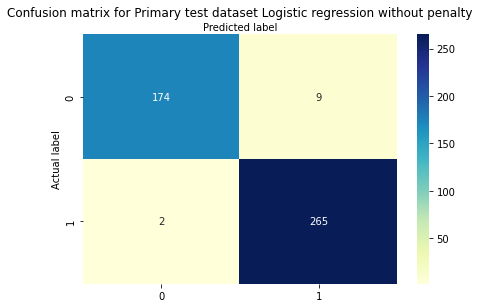

In [221]:
cnf_matrix_l1_primary_dataset = metrics.confusion_matrix(y_test, y_hat_lr_test)
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks([0, 1], label=class_names)
plt.yticks(tick_marks, label=class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_l1_primary_dataset),annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Primary test dataset Logistic regression without penalty', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


## Confusion matrix for Secondary test dataset

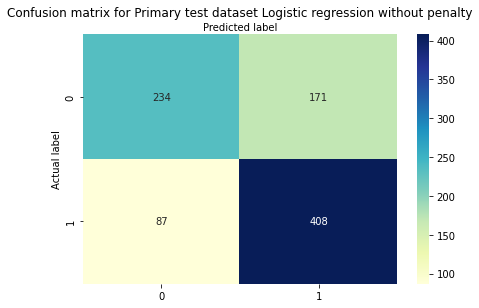

In [222]:
cnf_matrix_l1_secondary_dataset = metrics.confusion_matrix(y2_test, y_hat_secondary_dataset_test)
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks([0, 1], label=class_names)
plt.yticks(tick_marks, label=class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_l1_secondary_dataset),annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Primary test dataset Logistic regression without penalty', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


## Training a Logistic Regression model with l2 penalty

In [223]:
%%time
lr2_model = LogisticRegression(penalty="l2",
                               solver="lbfgs",
                               multi_class="multinomial",
                               max_iter=5000,
                               C=10).fit(X_train, y_train)
                               
y_hat_lr2_test = lr2_model.predict(X_test)

y2_hat_lr2_test = lr2_model.predict(X2_test)


CPU times: user 96.4 ms, sys: 236 µs, total: 96.7 ms
Wall time: 98.9 ms


## Check the Logistic Regression Model with penalty fit metrics (precision, recall, f1 score, support, accuracy and weighted average) for Primary Dataset

In [224]:
print(classification_report(y_test, y_hat_lr2_test))

              precision    recall  f1-score   support

     [False]       0.99      0.95      0.97       183
      [True]       0.97      0.99      0.98       267

    accuracy                           0.98       450
   macro avg       0.98      0.97      0.97       450
weighted avg       0.98      0.98      0.98       450



## Check the Logistic Regression Model with penalty fit metrics (precision, recall, f1 score, support, accuracy and weighted average) for Secondary Dataset

In [225]:
print(classification_report(y2_test, y2_hat_lr2_test))

              precision    recall  f1-score   support

     [False]       0.81      0.44      0.57       405
      [True]       0.67      0.92      0.77       495

    accuracy                           0.70       900
   macro avg       0.74      0.68      0.67       900
weighted avg       0.73      0.70      0.68       900



In [227]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_hat_rf_test = rf.predict(X_test)
y_hat_rf_secondary_dataset_test = rf.predict(X2_test)


In [206]:
print(classification_report(y_test, y_hat_nb_test)) # 30%

              precision    recall  f1-score   support

     [False]       0.98      0.90      0.93       183
      [True]       0.93      0.99      0.96       267

    accuracy                           0.95       450
   macro avg       0.95      0.94      0.95       450
weighted avg       0.95      0.95      0.95       450



In [228]:
print(classification_report(y2_test,y_hat_nb_secondary_dataset_test)) # secondary data

              precision    recall  f1-score   support

     [False]       0.57      0.43      0.49       405
      [True]       0.61      0.74      0.67       495

    accuracy                           0.60       900
   macro avg       0.59      0.58      0.58       900
weighted avg       0.60      0.60      0.59       900



## Training a Logistic Regression model without penalty

In [229]:
%%time
lr_model = LogisticRegression(penalty="none",multi_class="multinomial",solver="lbfgs").fit(X_train, y_train)

# Predicting Test data from 1st dataset
y_hat_lr_test = lr_model.predict(X_test)

# Predicting Test data from Second Dataset
y_hat_secondary_dataset_test = lr_model.predict(X2_test)

CPU times: user 54.1 ms, sys: 0 ns, total: 54.1 ms
Wall time: 60 ms


## Check the Logistic Regression Model fit metrics (precision, recall, f1 score, support, accuracy and weighted average) for Test data from Primary Dataset

In [230]:
print(classification_report(y_test, y_hat_lr_test)) # 30%

              precision    recall  f1-score   support

     [False]       0.99      0.95      0.97       183
      [True]       0.97      0.99      0.98       267

    accuracy                           0.98       450
   macro avg       0.98      0.97      0.97       450
weighted avg       0.98      0.98      0.98       450



## Check the Logistic Regression Model fit metrics (precision, recall, f1 score, support, accuracy and weighted average) for Secondary Dataset

In [231]:
print(classification_report(y2_test,y_hat_secondary_dataset_test)) # secondary data

              precision    recall  f1-score   support

     [False]       0.73      0.58      0.64       405
      [True]       0.70      0.82      0.76       495

    accuracy                           0.71       900
   macro avg       0.72      0.70      0.70       900
weighted avg       0.72      0.71      0.71       900



## Confusion matrix for Primary test dataset

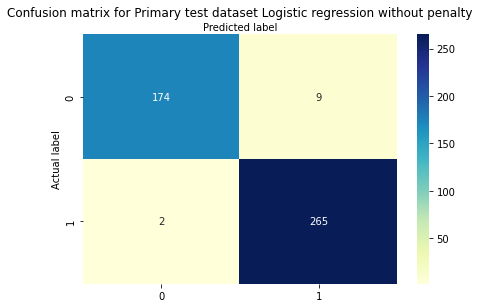

In [232]:
cnf_matrix_l1_primary_dataset = metrics.confusion_matrix(y_test, y_hat_lr_test)
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks([0, 1], label=class_names)
plt.yticks(tick_marks, label=class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_l1_primary_dataset),annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Primary test dataset Logistic regression without penalty', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


## Confusion matrix for Secondary test dataset

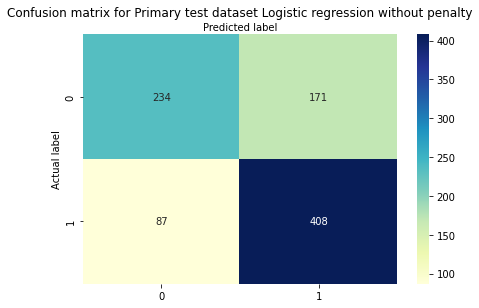

In [233]:
cnf_matrix_l1_secondary_dataset = metrics.confusion_matrix(y2_test, y_hat_secondary_dataset_test)
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks([0, 1], label=class_names)
plt.yticks(tick_marks, label=class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_l1_secondary_dataset),annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Primary test dataset Logistic regression without penalty', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


## Training a Logistic Regression model with l2 penalty

In [234]:
%%time
lr2_model = LogisticRegression(penalty="l2",
                               solver="lbfgs",
                               multi_class="multinomial",
                               max_iter=5000,
                               C=10).fit(X_train, y_train)
                               
y_hat_lr2_test = lr2_model.predict(X_test)

y2_hat_lr2_test = lr2_model.predict(X2_test)


CPU times: user 90.8 ms, sys: 0 ns, total: 90.8 ms
Wall time: 96.4 ms


## Check the Logistic Regression Model with penalty fit metrics  for Primary Dataset
(precision, recall, f1 score, support, accuracy and weighted average)

In [235]:
print(classification_report(y_test, y_hat_lr2_test))

              precision    recall  f1-score   support

     [False]       0.99      0.95      0.97       183
      [True]       0.97      0.99      0.98       267

    accuracy                           0.98       450
   macro avg       0.98      0.97      0.97       450
weighted avg       0.98      0.98      0.98       450



## Check the Logistic Regression Model with penalty fit metrics  for Secondary Dataset
(precision, recall, f1 score, support, accuracy and weighted average)

In [ ]:
print(classification_report(y2_test, y2_hat_lr2_test))

              precision    recall  f1-score   support

     [False]       0.80      0.41      0.55       405
      [True]       0.66      0.92      0.76       495

    accuracy                           0.69       900
   macro avg       0.73      0.66      0.66       900
weighted avg       0.72      0.69      0.67       900



## Feature engineering

In [236]:
#Feature one is finding vax in the text like #Vaxxed #antiVax #vax #covidvax etc
def feature_function(text):
    return int(bool("vax" in text.lower()))
    #return int(bool(re.match(r"^([A-Z][a-z]+\s+){3}", text)))

#Feature two is finding vaccin in the text like vaccination, vaccine , vaccinated, #vaccinated , #vaccine, #covidVaccine, Vaccination drive etc
def feature_function2(text):
    # Flags texts that start with three capitalized words
    return int(bool("vaccin" in text.lower()))

#Feature three is finding immun in the text like immunity %, immunization, immune, covid vaccine immuntiy etc
def feature_function3(text):
    # Flags texts that start with three capitalized words
    return int(bool("immun" in text.lower()))


##CHECK for word = 'CDC', 'Covid', 'Covid', 'Covid-19', 'COVID-19', 'COVIDVACCINE'

#Feature four is for finding words like phase 1 phase two trails etc in the text
def feature_function4(text):
    # Flags texts that start with three capitalized words
    #print(re.findall(r"(phase\s{0,1}([1-4] | (one | two | three | four))){1, 3}", text.lower(), flags=0))
    return int(bool(re.findall(r"(phase\s{0,1}([1-4]|(one|two|three|four))){1,3}(clinical trail|trails){0,1}", text.lower(), flags=0)))


# Applying the above features on the primary_data_train data set
new_feature_array1 = primary_data_train.text.apply(feature_function)
new_feature_array1_2 = primary_data_train.text.apply(feature_function2)
new_feature_array1_3 = primary_data_train.text.apply(feature_function3)
new_feature_array1_4 = primary_data_train.text.apply(feature_function4)

#Adding the new features to our training dataset
X_train_fin = np.insert(X_train.todense(), X_train.shape[1], new_feature_array1, axis=1)
X_train_fin = np.insert(X_train_fin, X_train_fin.shape[1], new_feature_array1_2, axis=1)
X_train_fin = np.insert(X_train_fin, X_train_fin.shape[1], new_feature_array1_3, axis=1)
X_train_fin = np.insert(X_train_fin, X_train_fin.shape[1], new_feature_array1_4, axis=1)

#Applying above features to our primary test data set
new_feature_array2 = primary_data_test.text.apply(feature_function2)
new_feature_array2_2 = primary_data_test.text.apply(feature_function2)
new_feature_array2_3 = primary_data_test.text.apply(feature_function3)
new_feature_array2_4 = primary_data_test.text.apply(feature_function4)

#Adding the new features to our primary test dataset
X_test_fin = np.insert(X_test.todense(), X_test.shape[1], new_feature_array2, axis=1)
X_test_fin = np.insert(X_test_fin, X_test_fin.shape[1], new_feature_array2_2, axis=1)
X_test_fin = np.insert(X_test_fin, X_test_fin.shape[1], new_feature_array2_3, axis=1)
X_test_fin = np.insert(X_test_fin, X_test_fin.shape[1], new_feature_array2_4, axis=1)

#Applying above features to our secondary test data set
new_feature_array3 = secondary_data.text.apply(feature_function)
new_feature_array3_2 = secondary_data.text.apply(feature_function2)
new_feature_array3_3 = secondary_data.text.apply(feature_function3)
new_feature_array3_4 = secondary_data.text.apply(feature_function4)

#Adding the new features to our secondary test dataset
X2_test_fin = np.insert(X2_test.todense(), X2_test.shape[1], new_feature_array3, axis=1)
X2_test_fin = np.insert(X2_test_fin, X2_test_fin.shape[1], new_feature_array3_2, axis=1)
X2_test_fin = np.insert(X2_test_fin, X2_test_fin.shape[1], new_feature_array3_3, axis=1)
X2_test_fin = np.insert(X2_test_fin, X2_test_fin.shape[1], new_feature_array3_4, axis=1)

#Checking the shapes of the training, testing datasets to see if new columns are added
print(X_train_fin.shape)
print(X_test_fin.shape)
print(X2_test_fin.shape)


(1050, 1569)
(450, 1569)
(900, 1569)


## Creating a Logistic Regression model with penalty using the dataset with added features.

In [237]:
lr2_model_with_features = LogisticRegression(penalty="l2",
                               solver="lbfgs",
                               multi_class="multinomial",
                               max_iter=5000,
                               C=10).fit(X_train_fin, y_train)
#print(lr2_model_with_features.coef_)
y_hat_lr2_test_features = lr2_model_with_features.predict(X_test_fin)

y2_hat_lr2_test_features = lr2_model_with_features.predict(X2_test_fin)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


## Check the Logistic Regression Model with penalty and added features fit metrics (precision, recall, f1 score, support, accuracy and weighted average) for Primary Test Dataset

In [238]:
print(classification_report(y_test, y_hat_lr2_test_features))


              precision    recall  f1-score   support

     [False]       1.00      0.92      0.96       183
      [True]       0.95      1.00      0.97       267

    accuracy                           0.97       450
   macro avg       0.97      0.96      0.96       450
weighted avg       0.97      0.97      0.97       450



## Check the Logistic Regression Model with penalty and added features fit metrics  for Secondary Test Dataset

(precision, recall, f1 score, support, accuracy and weighted average)

In [239]:
print(classification_report(y2_test, y2_hat_lr2_test_features))


              precision    recall  f1-score   support

     [False]       0.96      0.96      0.96       405
      [True]       0.97      0.97      0.97       495

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## Creating Confusion Matrices for better visualization of results above

In [240]:
print("Secondary Dataset without features")
cnf_matrix_without_features_secondary_test_dataset = metrics.confusion_matrix(y2_test, y2_hat_lr2_test)
print(cnf_matrix_without_features_secondary_test_dataset)

print("Secondary Dataset with features")
cnf_matrix_with_features_secondary_test_dataset = metrics.confusion_matrix(
    y2_test, y2_hat_lr2_test_features)
print(cnf_matrix_with_features_secondary_test_dataset)

print("\nPrimary Dataset without features")
cnf_matrix_without_features_primary_test_dataset = metrics.confusion_matrix(y_test, y_hat_lr2_test)
print(cnf_matrix_without_features_primary_test_dataset)

print("Primary Dataset with features")
cnf_matrix_with_features_primary_test_dataset = metrics.confusion_matrix(y_test, y_hat_lr2_test_features)
print(cnf_matrix_with_features_primary_test_dataset)



Secondary Dataset without features
[[177 228]
 [ 42 453]]
Secondary Dataset with features
[[390  15]
 [ 15 480]]

Primary Dataset without features
[[174   9]
 [  2 265]]
Primary Dataset with features
[[168  15]
 [  0 267]]


## Confusion matrix for Primary test dataset without features

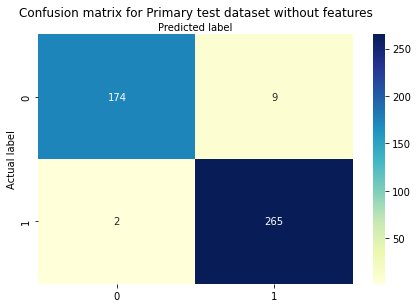

In [241]:
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks([0,1], label=class_names)
plt.yticks(tick_marks, label=class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_without_features_primary_test_dataset),
            annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Primary test dataset without features', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



## Confusion matrix for Primary test dataset with features

Text(0.5, 257.44, 'Predicted label')

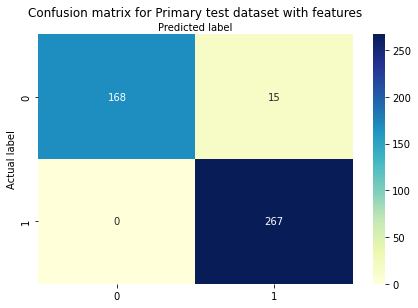

In [242]:
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_with_features_primary_test_dataset),
            annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Primary test dataset with features', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


## Confusion matrix for Secondary test dataset without features

Text(0.5, 257.44, 'Predicted label')

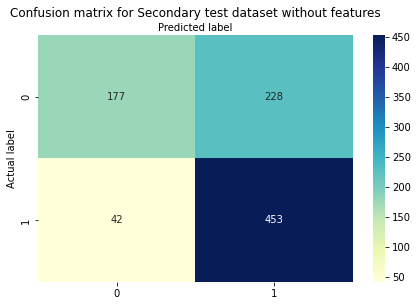

In [243]:
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_without_features_secondary_test_dataset),
            annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Secondary test dataset without features', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


## Confusion matrix for Secondary test dataset with features

Text(0.5, 257.44, 'Predicted label')

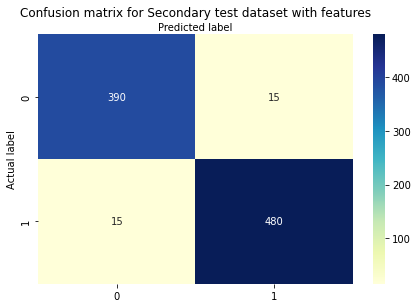

In [244]:
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_with_features_secondary_test_dataset),
            annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Secondary test dataset with features', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


## Plotting accuracies for Logistic Regression, Logistic regression with Penalty and Logistic Regression with penalty and added features

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


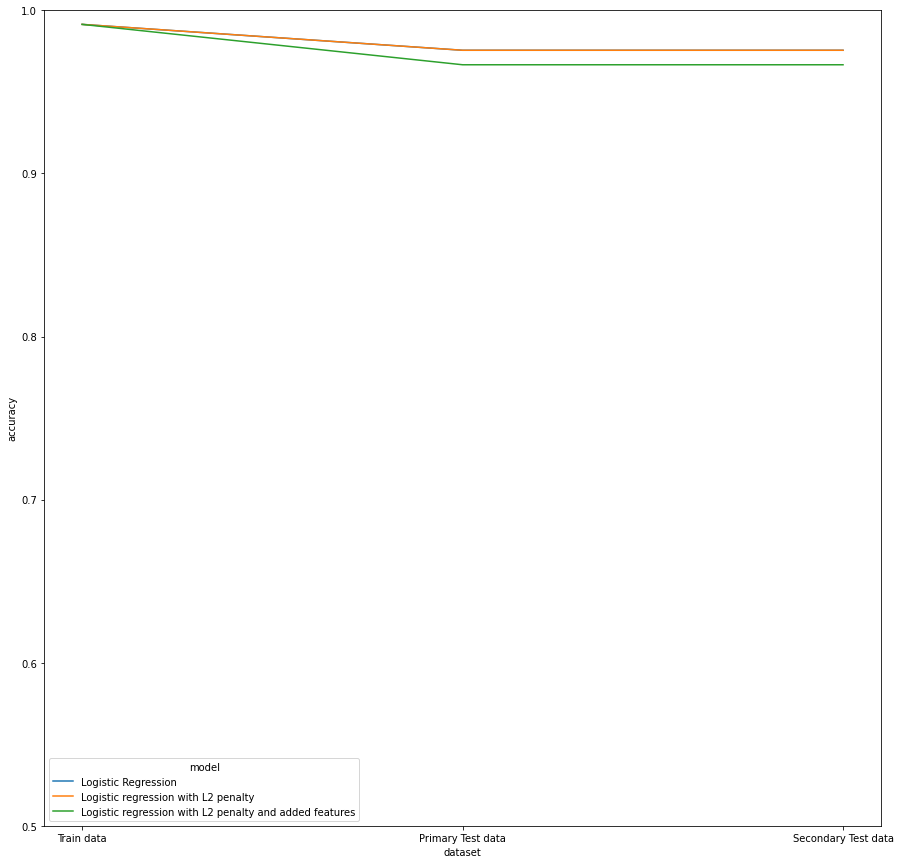

In [245]:
models_used = {"Logistic Regression": lr_model,
               "Logistic regression with L2 penalty": lr2_model, "Logistic regression with L2 penalty and added features": lr2_model_with_features}
plot_data = []

for name, model in models_used.items():
    if(model == lr2_model_with_features):
        train_acc = accuracy_score(y_train, model.predict(X_train_fin))
        plot_data.append([name, "Train data", train_acc])
        test_acc_pd = accuracy_score(y_test, model.predict(X_test_fin))
        plot_data.append([name, "Primary Test data", test_acc_pd])
        test_acc_sd = accuracy_score(y2_test, model.predict(X2_test_fin))
        plot_data.append([name, "Secondary Test data", test_acc_pd])
    else:
        train_acc = accuracy_score(y_train, model.predict(X_train))
        plot_data.append([name, "Train data", train_acc])
        test_acc_pd = accuracy_score(y_test, model.predict(X_test))
        plot_data.append([name, "Primary Test data", test_acc_pd])
        test_acc_sd = accuracy_score(y2_test, model.predict(X2_test))
        plot_data.append([name, "Secondary Test data", test_acc_pd])
plt.figure(figsize=(15, 15))
plt.ylim((0.5, 1))
plot_df = pd.DataFrame(plot_data, columns=["model", "dataset", "accuracy"])
sns.lineplot(data=plot_df,
             sort=False,
             x="dataset",
             y="accuracy",
             hue="model")
plt.show()


# Bag of words using Keras 

In [246]:
#import packages 
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [247]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Merged files/merged-csv-files.csv')

In [248]:
train_size = int(len(data) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 1050
Test size: 450


In [249]:
train_text = data['text'][:train_size]
train_max_freq_val = data['max_freq_val'][:train_size]

test_text = data['text'][train_size:]
test_max_freq_val = data['max_freq_val'][train_size:]

In [250]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [251]:
tokenize.fit_on_texts(train_text) # only fit on train
X_train = tokenize.texts_to_matrix(train_text)
X_test = tokenize.texts_to_matrix(test_text)

In [252]:
encoder = LabelEncoder()
encoder.fit(train_max_freq_val)
y_train = encoder.transform(train_max_freq_val)
y_test = encoder.transform(test_max_freq_val)

In [253]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [254]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1050, 1000)
X_test shape: (450, 1000)
y_train shape: (1050, 2)
y_test shape: (450, 2)


In [255]:
batch_size = 32
epochs = 2

In [256]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [257]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/2
30/30 [==============================] - 1s 13ms/step - loss: 0.4986 - accuracy: 0.7661 - val_loss: 0.2566 - val_accuracy: 0.9238
Epoch 2/2
30/30 [==============================] - 0s 8ms/step - loss: 0.1910 - accuracy: 0.9598 - val_loss: 0.1113 - val_accuracy: 0.9714


In [258]:
score = model.evaluate(X_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

15/15 [==============================] - 0s 3ms/step - loss: 0.1058 - accuracy: 0.9889
Test accuracy: 0.9888888597488403


In [ ]:
from dataclasses import replace
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Merged files/merged-csv-files.csv')
df.head(5)

,text,max_freq_val
0,\n\n\n\n\n\n\n#CovidVaccine\n#WaitForVaccine… ...,[True]
1,CDC Updates School Guidelines For Students Ret...,[False]
2,Who will get the first doses of a coronavirus ...,[True]
3,CDC puts in place new guidelines on masks in s...,[False]
4,People who are fully vaccinated can travel wit...,[True]


In [ ]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:11])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#remove stopwords 
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
df['title_wo_punct_split_wo_stopwords'] = df['title_wo_punct_split'].apply(lambda x: remove_stopwords(x))
df.head()

,text,max_freq_val,title_wo_punct,title_wo_punct_split,title_wo_punct_split_wo_stopwords
0,\n\n\n\n\n\n\n#CovidVaccine\n#WaitForVaccine… ...,[True],\n\n\n\n\n\n\nCovidVaccine\nWaitForVaccine… ht...,"[, covidvaccine, waitforvaccine, httpstcoghykg...","[, covidvaccine, waitforvaccine, httpstcoghykg..."
1,CDC Updates School Guidelines For Students Ret...,[False],CDC Updates School Guidelines For Students Ret...,"[cdc, updates, school, guidelines, for, studen...","[cdc, updates, school, guidelines, students, r..."
2,Who will get the first doses of a coronavirus ...,[True],Who will get the first doses of a coronavirus ...,"[who, will, get, the, first, doses, of, a, cor...","[get, first, doses, coronavirus, vaccine, expe..."
3,CDC puts in place new guidelines on masks in s...,[False],CDC puts in place new guidelines on masks in s...,"[cdc, puts, in, place, new, guidelines, on, ma...","[cdc, puts, place, new, guidelines, masks, sch..."
4,People who are fully vaccinated can travel wit...,[True],People who are fully vaccinated can travel wit...,"[people, who, are, fully, vaccinated, can, tra...","[people, fully, vaccinated, travel, within, us..."


#  Word frequency for Primary data set 

In [260]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [261]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Merged files/merged-csv-files.csv')
df.dtypes


text            object
max_freq_val    object
dtype: object

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          1500 non-null   object
 1   max_freq_val  1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB


In [263]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [264]:
tweets= " ".join(df['text'])
words = word_tokenize(tweets)

In [265]:
def clean_words(new_tokens):
  new_tokens = [t.lower() for t in new_tokens]
  new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
  new_tokens = [t for t in new_tokens if t.isalpha()]
  lemmatizer = WordNetLemmatizer()
  new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
  return new_tokens

In [266]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [267]:
lowered = clean_words(words)

In [268]:
bow = Counter(lowered)
bow

Counter({'covidvaccine': 350,
         'http': 1045,
         'cdc': 805,
         'update': 30,
         'school': 115,
         'guideline': 755,
         'student': 50,
         'returning': 10,
         'fall': 15,
         'get': 100,
         'first': 105,
         'dos': 25,
         'coronavirus': 80,
         'vaccine': 370,
         'expert': 10,
         'put': 30,
         'place': 5,
         'new': 100,
         'mask': 220,
         'people': 150,
         'fully': 45,
         'vaccinated': 200,
         'travel': 25,
         'within': 15,
         'according': 20,
         'updated': 10,
         'announced': 25,
         'friday': 15,
         'charlotte': 5,
         'flight': 10,
         'bound': 5,
         'bahamas': 5,
         'canceled': 5,
         'group': 25,
         'boston': 5,
         'refused': 5,
         'follow': 110,
         'required': 30,
         'recommended': 35,
         'quarantining': 5,
         'able': 15,
         'return': 5,
       

In [269]:
data = pd.DataFrame(bow.items(),columns=['word', 'frequency']).sort_values(by = 'frequency', ascending = False)
data =data.head(20)


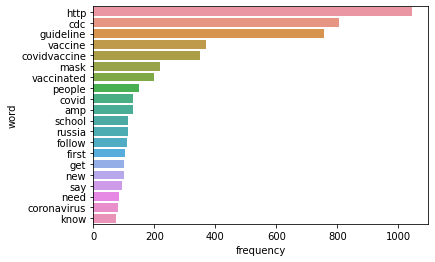

In [270]:
sns.barplot(x='frequency' ,y='word',data=data)